In [ ]:
import pandas as pd
bop_data = pd.read_csv('/content/bop_data.csv')
bop_data.head()

,Site,Date,live_dead,shell_height_mm,total_live,sample,time,latitude,longitude,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL
0,Bush Terminal Park,7/20/2016,NaN,12.0,81.700855,A,2:14:00 PM,40.653736,-74.018760,0.0,8.64,37.4,16.0,21.410534,27.40,23.8,12.15
1,Bush Terminal Park,7/20/2016,NaN,12.0,81.700855,B,2:22:00 PM,40.654206,-74.019517,0.0,8.21,37.8,12.0,23.100000,25.52,24.0,8.26
2,Bush Terminal Park,7/20/2016,NaN,12.0,81.700855,C,2:26:00 PM,40.654473,-74.019106,1.0,8.35,38.3,8.9,23.400000,25.27,24.3,9.19
3,Bush Terminal Park,7/20/2016,NaN,12.0,81.700855,D,2:30:00 PM,40.654269,-74.018720,1.0,8.69,38.6,14.1,23.500000,26.89,24.5,11.99
4,Bush Terminal Park,7/20/2016,NaN,12.0,81.700855,E,2:36:00 PM,40.654438,-74.018495,0.0,7.92,39.1,10.4,23.900000,24.66,24.9,7.53


In [ ]:
# Numeric libraries
import numpy as np
import pandas as pd

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Predictive models
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:
bop_data = bop_data.drop(columns=['Site', 'Date', 'sample','time', 'latitude', 'longitude','live_dead', 'total_live'], axis=1)

In [ ]:
bop_data2 = bop_data.dropna()
bop_data2 = bop_data.fillna(0)
bop_data2.head()

,shell_height_mm,depth_m,pH,cond_mScm,turb_NTU,TDS_gL,temp_C,sal_ppt,DO_mgL
0,12.0,0.0,8.64,37.4,16.0,21.410534,27.40,23.8,12.15
1,12.0,0.0,8.21,37.8,12.0,23.100000,25.52,24.0,8.26
2,12.0,1.0,8.35,38.3,8.9,23.400000,25.27,24.3,9.19
3,12.0,1.0,8.69,38.6,14.1,23.500000,26.89,24.5,11.99
4,12.0,0.0,7.92,39.1,10.4,23.900000,24.66,24.9,7.53


In [ ]:
X = bop_data2.drop(columns = ['depth_m', 'pH', 'cond_mScm','turb_NTU', 'TDS_gL', 'temp_C','DO_mgL', 'sal_ppt'])

In [ ]:
X.columns

Index(['shell_height_mm'], dtype='object')

In [ ]:
y = bop_data2['sal_ppt']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(normalize=True)

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict[:10]

array([23.08744759, 22.47788878, 22.52868534, 23.08744759, 23.34143043,
       22.93505788, 20.85239861, 21.56355056, 22.78266818, 18.87133248])

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, y_predict)

2.3230873425467835

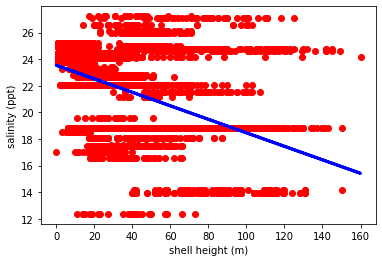

In [ ]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test, y_predict, color = 'blue', linewidth = 3)
plt.xlabel('shell height (m)')
plt.ylabel('salinity (ppt)')
plt.show()

In [ ]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':y_predict})

In [ ]:
result

,Actual,Predicted
222,23.80000,23.087448
12947,23.30000,22.477889
14592,22.80000,22.528685
1971,24.50000,23.087448
2871,24.50000,23.341430
...,...,...
2773,24.00000,23.189041
7596,23.80000,23.189041
17813,18.84295,17.652215
17164,18.84295,22.022402
